# 와인 품질 분류

wine_quality.csv 파일이 존재합니다.

와인의 여러가지 화학 성분을 기반으로 와인의 품질을 분류해내는 것이 목표입니다.

- index 구분자
- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

데이터셋 출처: https://dacon.io/competitions/open/235610/data

(학습을 위해 원래 데이터셋에서 test.csv는 제외하고, train.csv 파일만을 고려하여 진행했습니다.)

In [58]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#데이터셋 불러오기
wine_data = pd.read_csv('D:/Downloads/2022-1-Euron-DA-Week_4/2022-1-Euron-DA-Week_4/Week4_복습과제_데이터/Week4_복습과제_데이터/wine_quality.csv')

## 데이터 전처리, EDA 및 시각화

### wine_data 데이터를 살펴보고, 쓸모 없는 column을 삭제하시오.(index column 삭제)

In [60]:
wine_data

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [61]:
wine_data.drop('index',axis=1 , inplace=True)

In [62]:
print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB
None


In [63]:
#wine_data.columns 결과 확인
wine_data.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

### info()를 결측치가 있는지 확인하고, describe()를 통해 수치형 피쳐들의 scale을 살펴보고, 스케일링을 진행해야 하는지 살펴보시오. 

In [64]:
wine_data.info()
#결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [65]:
wine_data.describe()
#히스토그램을 그려보면 확실히 알 수 있겠지만, mean값과 최대값 차이를 볼때, 스케일링 필요해보임

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### wine_data에서 각 피쳐들 간의 상관관계를 나타내는 히트맵을 출력하시오.

<AxesSubplot:>

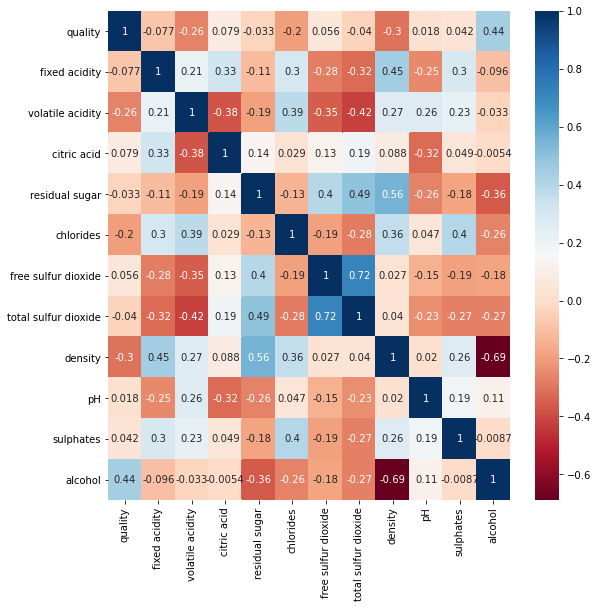

In [66]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = wine_data.corr()
sns.heatmap(corr, cmap='RdBu', annot = True)

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_wine, y_wine으로 저장하시오. (target은 quality)

In [71]:
X_wine = wine_data.iloc[:,1:]
y_wine = wine_data.iloc[:,0]

In [72]:
#데이터 확인(X_wine)
X_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [73]:
#데이터 확인(y_wine)
y_wine

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

### 피쳐값 중 카테고리 변수가 1가지 있다. 이에 대해 Encoding을 진행하시오.

In [74]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(X_wine['type'])
X_wine['type']=encoder.transform(X_wine['type'])
print(X_wine['type'])

0       1
1       0
2       1
3       1
4       1
       ..
5492    1
5493    1
5494    1
5495    1
5496    1
Name: type, Length: 5497, dtype: int32


In [75]:
#Encoding이 잘 되었는지 확인
X_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


### 피쳐값에 대해 MinMaxScaler()를 이용해 스케일링을 하시오.
- 스케일링 된 피쳐값은 데이터프레임 형식으로 X_wine_scaled에 저장

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_wine)
X_wine_scaled = scaler.transform(X_wine)
X_wine_scaled = pd.DataFrame(X_wine_scaled,columns = X_wine.columns)
X_wine_scaled = X_wine_scaled.astype({'type':'int'})

In [97]:
#Scaling 잘 되었는지 확인
X_wine_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,1
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,0
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,1
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,1
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.322314,0.046667,0.174699,0.010736,0.033278,0.031250,0.133641,0.117409,0.480315,0.095506,0.304348,1
5493,0.206612,0.066667,0.216867,0.009202,0.041597,0.086806,0.241935,0.069983,0.330709,0.162921,0.434783,1
5494,0.330579,0.046667,0.204819,0.007669,0.043261,0.104167,0.200461,0.074224,0.259843,0.280899,0.478261,1
5495,0.231405,0.220000,0.186747,0.015337,0.054908,0.059028,0.218894,0.093310,0.307087,0.106742,0.362319,1


### train_test_split()을 이용해 train set와 test set를 분리하시오.
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 123

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
                                                    test_size=0.2, random_state=123)

In [100]:
#잘 분리되었는지 확인
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(y_train.shape , y_test.shape))

학습 세트 Shape:(4397, 12), 테스트 세트 Shape:(1100, 12)
학습 세트 Shape:(4397,), 테스트 세트 Shape:(1100,)


### GradientBoostingClassifier을 사용해 train data를 fit 한 후, test data로 예측을 수행하고 정확도를 구하시오

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

gb_clf = GradientBoostingClassifier(random_state=123)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [105]:
gb_accuracy

0.5427272727272727

### GridSearchCV를 사용해 최적 하이퍼 파라미터 조합을 찾으시오
params={
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,500]
}

In [106]:
from sklearn.model_selection import GridSearchCV

params={
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,500]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'learning_rate': 0.1, 'n_estimators': 500}
0.5824433804595603


최적으로 학습된 estimator로 예측을 수행하시오

In [107]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(gb_accuracy)

0.5654545454545454


## XGBoost 및 LightGBM 실습

### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도 및 F1 스코어를 출력하시오.
- n_estimators=400
- learning_rate = 0.1
- max_depth = 3

In [ ]:
#accuracy_score(), f1_score 임포트
#f1_score는 기본적으로 이진분류에 사용되므로, 다중분류에서 사용하고 싶으면 average='무엇무엇' 설정해주면 됨
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 공식 문서 참고

In [108]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [113]:
xgb_clf = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3, random_state=123)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1score_macro = f1_score(y_test, xgb_pred, average='macro')
xgb_f1score_micro = f1_score(y_test, xgb_pred, average='micro')
xgb_f1score_weighted = f1_score(y_test, xgb_pred, average='weighted')

[22:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [114]:
print(xgb_accuracy)
print(xgb_f1score_macro)
print(xgb_f1score_micro)
print(xgb_f1score_weighted)

0.5854545454545454
0.3402714324071237
0.5854545454545454
0.5750880303152167


### 사이킷런 래퍼 클래스 LightGBM와 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합과 그 하이퍼 파라미터의 예측 정확도를 구하시오.
- 'n_estimators' : [100,200,300,400,500]
- 'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2]
- 'max_depth' : [3,4,5,6,7]

(제 컴퓨터에선 2분정도 걸려욤)

In [118]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [100,200,300,400,500],
'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2],
'max_depth' : [3,4,5,6,7]}
clf=GridSearchCV(lgbm_wrapper,parameters,scoring='accuracy')


clf.fit(X_train, y_train) 
print(clf.best_params_) 
predicted=clf.predict(X_test) 
print('Classification of the result is:') 
print(accuracy_score(y_test, predicted))

[1]	valid_0's multi_logloss: 1.24616
[2]	valid_0's multi_logloss: 1.19818
[3]	valid_0's multi_logloss: 1.1667
[4]	valid_0's multi_logloss: 1.13969
[5]	valid_0's multi_logloss: 1.11497
[6]	valid_0's multi_logloss: 1.09672
[7]	valid_0's multi_logloss: 1.07923
[8]	valid_0's multi_logloss: 1.06413
[9]	valid_0's multi_logloss: 1.05144
[10]	valid_0's multi_logloss: 1.0408
[11]	valid_0's multi_logloss: 1.02955
[12]	valid_0's multi_logloss: 1.02077
[13]	valid_0's multi_logloss: 1.01497
[14]	valid_0's multi_logloss: 1.00789
[15]	valid_0's multi_logloss: 1.00347
[16]	valid_0's multi_logloss: 0.997805
[17]	valid_0's multi_logloss: 0.991856
[18]	valid_0's multi_logloss: 0.986368
[19]	valid_0's multi_logloss: 0.981796
[20]	valid_0's multi_logloss: 0.97696
[21]	valid_0's multi_logloss: 0.974301
[22]	valid_0's multi_logloss: 0.970603
[23]	valid_0's multi_logloss: 0.967939
[24]	valid_0's multi_logloss: 0.963912
[25]	valid_0's multi_logloss: 0.962303
[26]	valid_0's multi_logloss: 0.961143
[27]	valid_0'

KeyboardInterrupt: 

In [119]:
params = {
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2],
    'max_depth' : [3,4,5,6,7]
}

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals,
                verbose=True)
preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, scoring='accuracy')
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

[1]	valid_0's multi_logloss: 1.24616
[2]	valid_0's multi_logloss: 1.19818
[3]	valid_0's multi_logloss: 1.1667
[4]	valid_0's multi_logloss: 1.13969
[5]	valid_0's multi_logloss: 1.11497
[6]	valid_0's multi_logloss: 1.09672
[7]	valid_0's multi_logloss: 1.07923
[8]	valid_0's multi_logloss: 1.06413
[9]	valid_0's multi_logloss: 1.05144
[10]	valid_0's multi_logloss: 1.0408
[11]	valid_0's multi_logloss: 1.02955
[12]	valid_0's multi_logloss: 1.02077
[13]	valid_0's multi_logloss: 1.01497
[14]	valid_0's multi_logloss: 1.00789
[15]	valid_0's multi_logloss: 1.00347
[16]	valid_0's multi_logloss: 0.997805
[17]	valid_0's multi_logloss: 0.991856
[18]	valid_0's multi_logloss: 0.986368
[19]	valid_0's multi_logloss: 0.981796
[20]	valid_0's multi_logloss: 0.97696
[21]	valid_0's multi_logloss: 0.974301
[22]	valid_0's multi_logloss: 0.970603
[23]	valid_0's multi_logloss: 0.967939
[24]	valid_0's multi_logloss: 0.963912
[25]	valid_0's multi_logloss: 0.962303
[26]	valid_0's multi_logloss: 0.961143
[27]	valid_0'

KeyboardInterrupt: 

In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(gb_accuracy)

### plot_importance()를 통해 피쳐 중요도를 시각화하고, 어떤 피쳐가 가장 중요한지 기술하시오.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

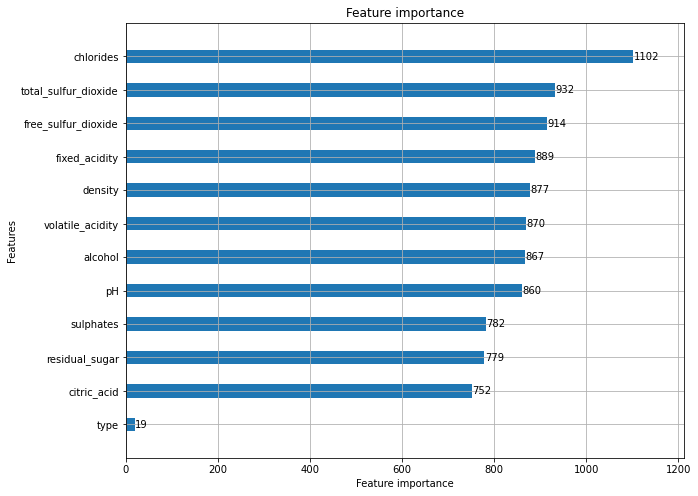

In [120]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(lgbm_clf, ax=ax , max_num_features=20,height=0.4)
#

## 스태킹 실습

### CV 세트 기반의 스태킹을 진행하려 한다. 개별 기반 모델들이 교차 검증을 통해 최종 메타 모델이 사용할 학습용, 테스트용 데이터를 생성하기 위한 함수를 작성하시오.
```
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    return train_fold_pred , test_pred_mean
```

In [121]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        model.fit(X_tr , y_tr)       
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1) 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    return train_fold_pred , test_pred_mean

### 스태킹에 사용될 머신러닝 알고리즘 클래스를 생성하시오.
- 개별 모델: KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, 에이다부스트(n_estimators=100), LightGBM(n_estimators=400)
- 최종 모델: 로지스틱 회귀(C=10)

In [150]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
lgbm_clf = LGBMClassifier(n_estimators=400)
lr_final = LogisticRegression(C=10)

TypeError: __init__() got an unexpected keyword argument 'random_state'

### 개별 모델별로 get_stacking_base_datasets 함수를 수행하여 최종 메타 모델이 사용할 학습용, 테스트용 데이터를 생성하시오.
- 폴드 개수는 7개

In [156]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하는 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
    
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    
    return train_fold_pred, test_pred_mean

In [154]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test,n_folds= 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_clf, X_train, y_train, X_test, 7)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

### 생성된 학습용 데이터와 테스트용 데이터를 각각 합치시오.
- 학습용 데이터는 Stack_final_X_train
- 테스트용 데이터는 Stack_final_X_test

In [124]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train,lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test, lgbm_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

NameError: name 'knn_train' is not defined

### 최종 메타 모델인 로지스틱 회귀를 사용하여 학습 및 예측을 진행하고 최종 메타 모델의 예측 정확도를 출력하시오.

In [125]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

NameError: name 'Stack_final_X_train' is not defined

# 버섯 독성 여부 분류 - CatBoost 실습

mushrooms.csv 파일을 사용합니다.

독성 버섯인지 식용 가능한 버섯인지 분류해내는 것이 목표입니다.

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

데이터셋 출처: https://www.kaggle.com/datasets/uciml/mushroom-classification

In [126]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np

In [127]:
#데이터셋 불러오기
mushroom_data = pd.read_csv('D:/Downloads/2022-1-Euron-DA-Week_4/2022-1-Euron-DA-Week_4/Week4_복습과제_데이터/Week4_복습과제_데이터/mushrooms.csv')

## 데이터 전처리

### info()를 통해 결측치가 있는지 확인하시오.

In [128]:
mushroom_data.info()
#결측치

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_mushroom, y_mushroom으로 저장하시오
- target은 class

In [129]:
X_mushroom = mushroom_data.iloc[:,1:]
y_mushroom = mushroom_data.iloc[:,0]

In [130]:
#데이터 확인(X_mushroom)
X_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [131]:
#데이터 확인(y_mushroom)
y_mushroom

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

### train_test_split()을 이용해 train set과 test set을 분리하시오.

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
                                                    test_size=0.2, random_state=123)

In [133]:
#잘 분리되었는지 확인
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(y_train.shape , y_test.shape))

학습 세트 Shape:(4397, 12), 테스트 세트 Shape:(1100, 12)
학습 세트 Shape:(4397,), 테스트 세트 Shape:(1100,)


### CatBoost를 진행할 수 있도록 범주형 변수를 처리하시오.
- trainset은 train_pool에 저장
- testset은 test_pool에 저장

In [135]:
import numpy as np
from catboost import Pool

train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

### CatBoost 모델을 기반으로 버섯에 대한 정보를 학습하고 버섯의 독성 여부를 예측하시오.
- iteration=400, learning_rate=0.1, max_depth=3
- catb_predes, catb_pred_proba

In [158]:
from catboost import CatBoostClassifier

catb = CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
catb.fit(train_pool)
catb_predes = catb.predict(test_pool)
catb_pred_proba = catb.predict_proba(test_pool)[:,1]

0:	learn: 1.7945952	total: 178ms	remaining: 1m 10s
1:	learn: 1.6809981	total: 182ms	remaining: 36.2s
2:	learn: 1.5869783	total: 186ms	remaining: 24.6s
3:	learn: 1.5114185	total: 189ms	remaining: 18.8s
4:	learn: 1.4507274	total: 193ms	remaining: 15.3s
5:	learn: 1.4042158	total: 197ms	remaining: 12.9s
6:	learn: 1.3644244	total: 201ms	remaining: 11.3s
7:	learn: 1.3308338	total: 205ms	remaining: 10s
8:	learn: 1.2980614	total: 208ms	remaining: 9.05s
9:	learn: 1.2725852	total: 212ms	remaining: 8.28s
10:	learn: 1.2503275	total: 216ms	remaining: 7.63s
11:	learn: 1.2313198	total: 219ms	remaining: 7.09s
12:	learn: 1.2154534	total: 223ms	remaining: 6.64s
13:	learn: 1.2006917	total: 227ms	remaining: 6.25s
14:	learn: 1.1884776	total: 230ms	remaining: 5.91s
15:	learn: 1.1750200	total: 234ms	remaining: 5.61s
16:	learn: 1.1632058	total: 238ms	remaining: 5.35s
17:	learn: 1.1520039	total: 241ms	remaining: 5.12s
18:	learn: 1.1424300	total: 244ms	remaining: 4.9s
19:	learn: 1.1345236	total: 248ms	remaining

### 예측 성능을 평가하시오.

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    F1 = f1_score(y_test, y_pred, average='macro')
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))

get_clf_eval(y_test, catb_predes)

오차행렬:
 [[  0   0   3   1   0   0   0]
 [  1   2  20  10   1   0   0]
 [  1   1 218 142   5   0   0]
 [  0   1 103 334  21   0   0]
 [  0   0   5 132  63   0   0]
 [  0   0   0  21  13   1   0]
 [  0   0   0   0   1   0   0]]

정확도: 0.5618
정밀도: 0.4646
재현율: 0.2463
F1: 0.2560
